In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
import hvplot.pandas

In [2]:
# Load the data for States percentage change of the adoption rates
df = pd.read_csv(
    Path("../../../data/processed_data/states_percent_change.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (305, 20)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.000179,0.841172,0.591998,-0.012008
1,2017,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.000629,0.796730,1.062883,-0.006019
2,2017,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.001232,0.845013,0.478094,-0.007985
3,2017,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.000115,0.806165,0.481551,-0.012488
4,2017,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.005928,0.880370,0.286051,-0.007949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.007406,0.869303,0.836773,-0.006377
301,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,0.015303,0.830680,0.578543,-0.011775
302,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.001276,0.851300,0.895916,-0.002779
303,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.002867,0.835872,0.701644,-0.005426


In [3]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [4]:
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        alpha=0.8,
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', bbox_to_anchor=(1, 1), ncol=2, **legend_style)

    return ax

In [5]:
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax


In [6]:
# df[["state"] == "Vermont"]

# get vermont values displayed

df[df["state"] == "Vermont"]

,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
44,2017,Vermont,624344.0,700,1600,12200,0,54600,700,0,0,0,518700,19600,8000,616100,0.001136,0.841909,1.323108,-0.009918
95,2018,Vermont,624358.0,1100,2000,12600,0,57500,600,0,0,0,513600,19100,7700,614200,0.001791,0.836210,0.576290,-0.006769
146,2019,Vermont,623989.0,1700,2000,13300,0,59100,600,0,0,0,509000,19400,7400,612500,0.002776,0.831020,0.549744,-0.006206
197,2020,Vermont,642936.0,2200,2300,13900,0,58800,500,0,0,0,501000,19700,6800,605200,0.003635,0.827826,0.309727,-0.003845
248,2021,Vermont,647093.0,3400,3200,15800,5600,42000,100,0,0,0,511900,15000,5400,602400,0.005644,0.849768,0.552638,0.026506
299,2022,Vermont,647110.0,5300,4200,17800,6400,40000,0,0,0,0,501500,14700,5100,595000,0.008908,0.842857,0.578211,-0.008132


In [7]:
filter_percentage = 0.0080
filter_growth_rate = df["ev_adoption_rate"] > filter_percentage

# check how many false and true values are in the filter
high_df = df.loc[filter_growth_rate].sort_values(["year", "ev_adoption_rate"]).reset_index(drop=True)

# high_df = high_df.loc[high_df['year'] == 2022].sort_values(["ev_adoption_rate"], ascending=False).reset_index(drop=True)

high_df["state"].value_counts()

state
California              5
Hawaii                  4
Oregon                  2
Washington              2
District of Columbia    2
Vermont                 1
Maryland                1
Massachusetts           1
Florida                 1
Utah                    1
Arizona                 1
Colorado                1
New Jersey              1
Nevada                  1
Name: count, dtype: int64

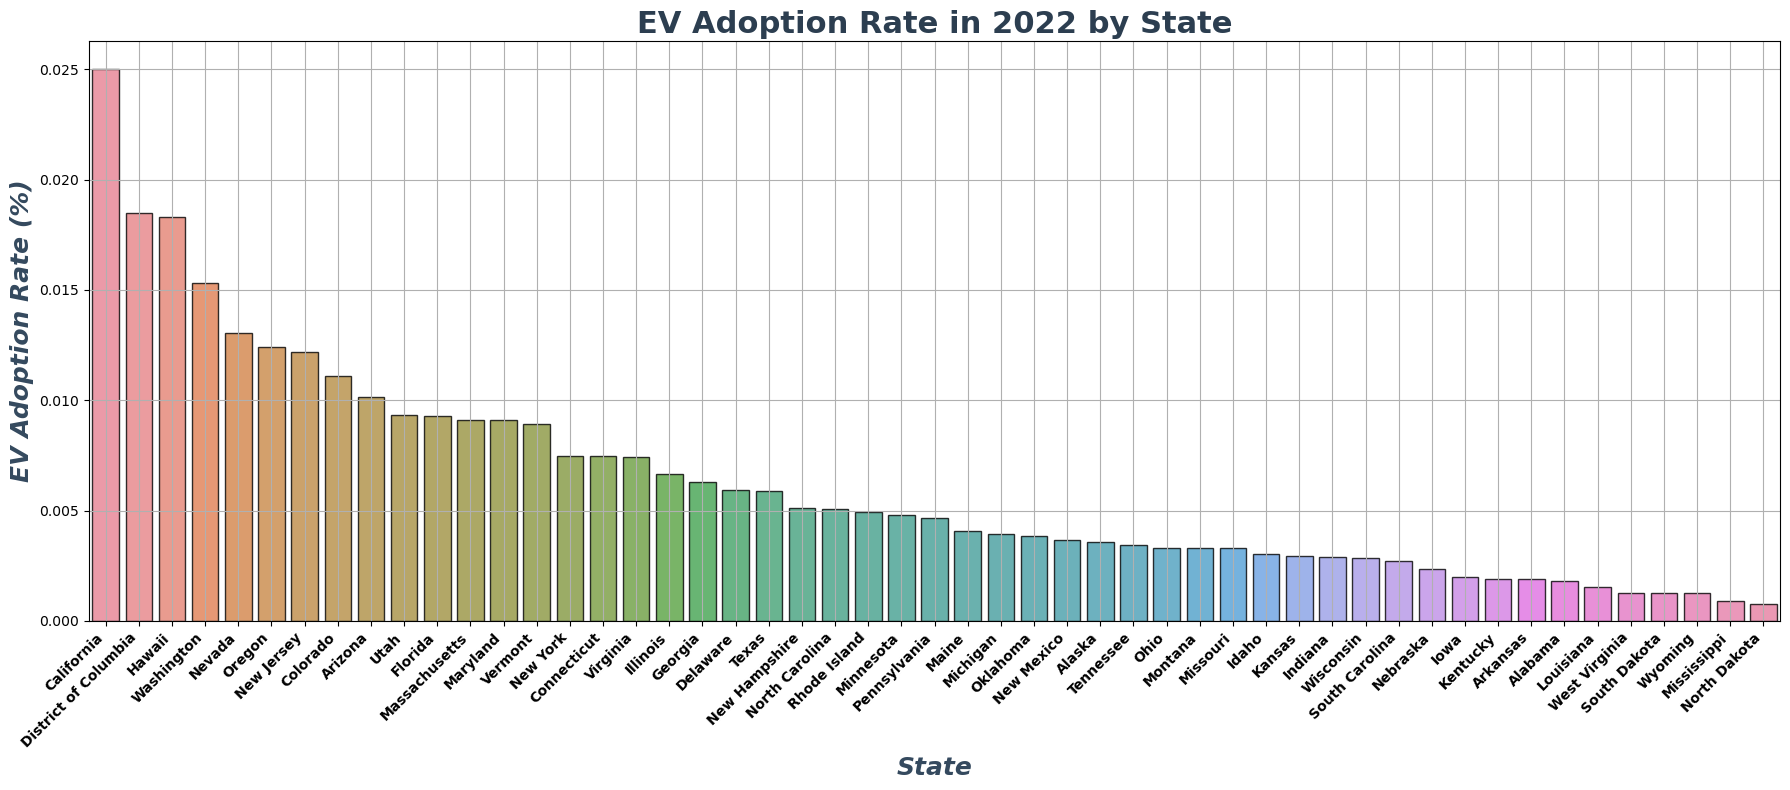

In [8]:
# Filter the data for the year to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='ev_adoption_rate', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='state', 
    y='ev_adoption_rate', 
    hue='state',
    title=f'EV Adoption Rate in {year_to_plot} by State',
    xlabel='State',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Save the plot
# file_name = f"ev_adoption_rate_in_{year_to_plot}_by_state.png"
# file_path = Path(f"../../../../reports/figures/{file_name}")
# plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.show()

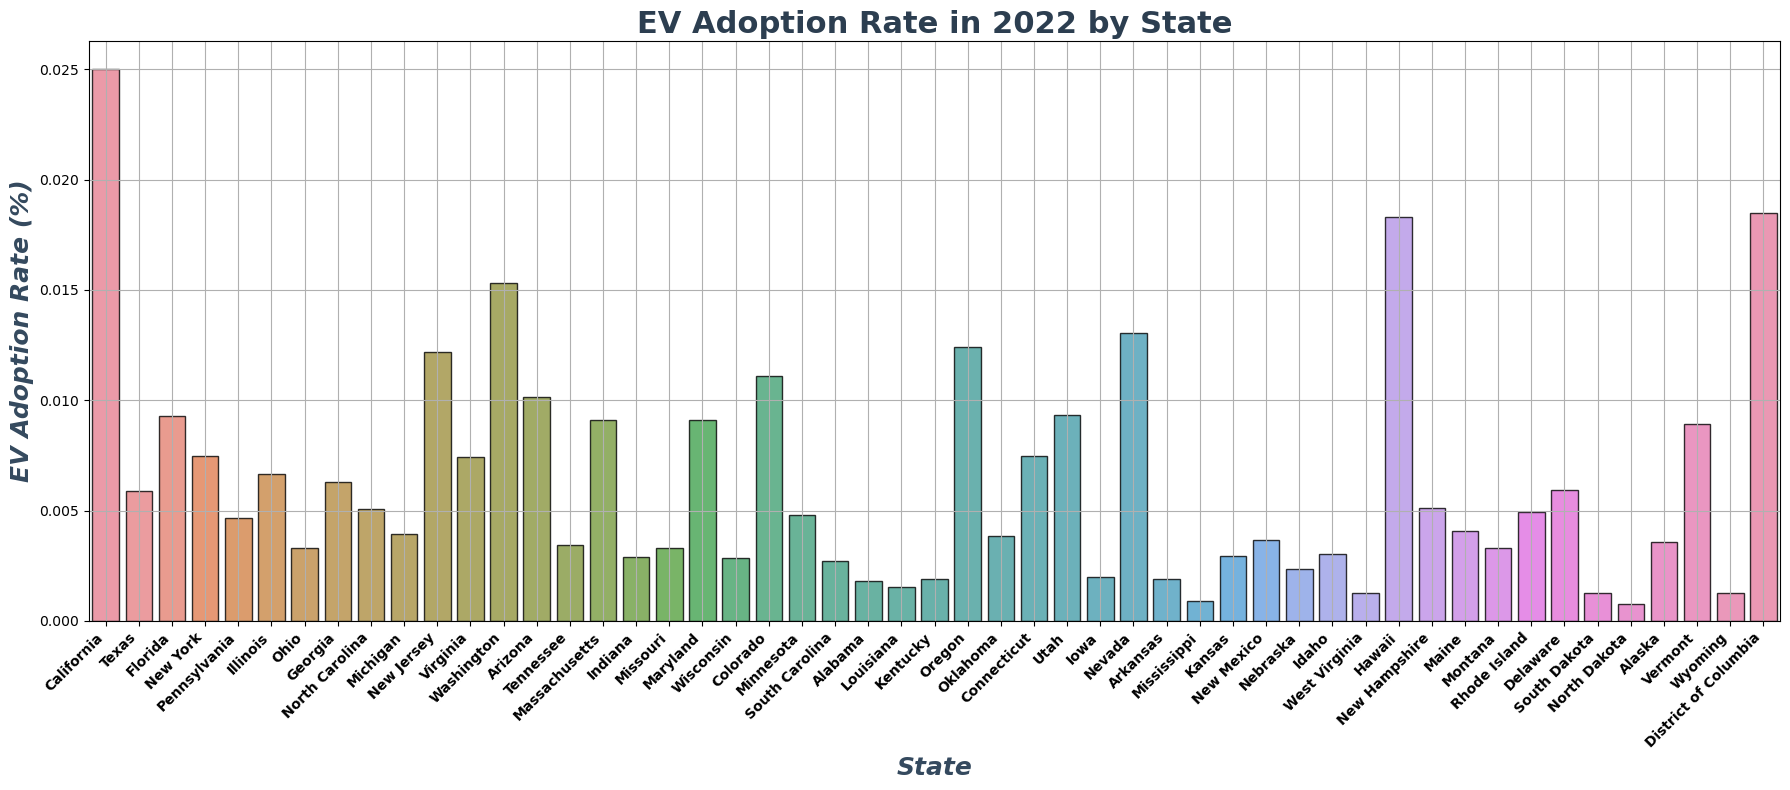

In [9]:
# Filter the data for the year to plot
year_to_plot = 2022
year_df = df[df['year'] == year_to_plot].sort_values(by='population', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_bar_plot(
    year_df, 
    ax,
    x='state', 
    y='ev_adoption_rate', 
    hue='state',
    title=f'EV Adoption Rate in {year_to_plot} by State',
    xlabel='State',
    ylabel='EV Adoption Rate (%)'
)

# Rotate x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Save the plot
# file_name = f"ev_adoption_rate_in_{year_to_plot}_by_state.png"
# file_path = Path(f"../../../../reports/figures/{file_name}")
# plt.savefig(file_path, bbox_inches='tight')

# Show the plot
plt.show()

In [10]:
high_df["state"].value_counts()

state
California              5
Hawaii                  4
Oregon                  2
Washington              2
District of Columbia    2
Vermont                 1
Maryland                1
Massachusetts           1
Florida                 1
Utah                    1
Arizona                 1
Colorado                1
New Jersey              1
Nevada                  1
Name: count, dtype: int64

In [11]:
# obtain list of index
state_values = high_df["state"].value_counts().index.tolist()

state_values

['California',
 'Hawaii',
 'Oregon',
 'Washington',
 'District of Columbia',
 'Vermont',
 'Maryland',
 'Massachusetts',
 'Florida',
 'Utah',
 'Arizona',
 'Colorado',
 'New Jersey',
 'Nevada']

In [12]:
top_states = df.loc[df["state"].isin(state_values), :]

# reorder based on `state` column has to be `state_values` ordered, ensure years are in ascending order
# top_states = top_states.set_index(["state", "year"]).loc[state_values].reset_index(drop=True)
top_states = top_states.set_index("state").loc[state_values].reset_index()

top_states

,state,year,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,California,2017,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.005928,0.880370,0.286051,-0.007949
1,California,2018,39461588.0,273500,215000,1085300,0,1615200,77700,0,9400,300,28646700,761600,129800,32814500,0.008335,0.872989,0.405946,-0.008384
2,California,2019,39512223.0,349700,247300,1154200,0,1698700,76200,0,12700,300,29210100,785800,136900,33671900,0.010386,0.867492,0.246053,-0.006297
3,California,2020,39503200.0,425300,265500,1228700,0,1745100,75300,0,14000,300,29642700,825900,116700,34339500,0.012385,0.863225,0.192541,-0.004919
4,California,2021,39145060.0,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,10400,35000500,0.016088,0.871776,0.299002,0.009907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Nevada,2018,3027341.0,5100,2900,37300,0,171800,6200,0,0,0,2005700,90600,32800,2352400,0.002168,0.852619,0.601172,-0.006934
80,Nevada,2019,3080156.0,7900,3600,40100,0,181300,5700,0,0,0,2037600,95500,32000,2403700,0.003287,0.847693,0.515960,-0.005777
81,Nevada,2020,3115840.0,11000,4200,42900,0,183700,5100,0,0,0,2036400,99100,28900,2411300,0.004562,0.844524,0.388016,-0.003739
82,Nevada,2021,3146632.0,17400,6300,50200,21300,133600,300,100,0,0,2140700,84700,22800,2477400,0.007023,0.864091,0.539613,0.023170


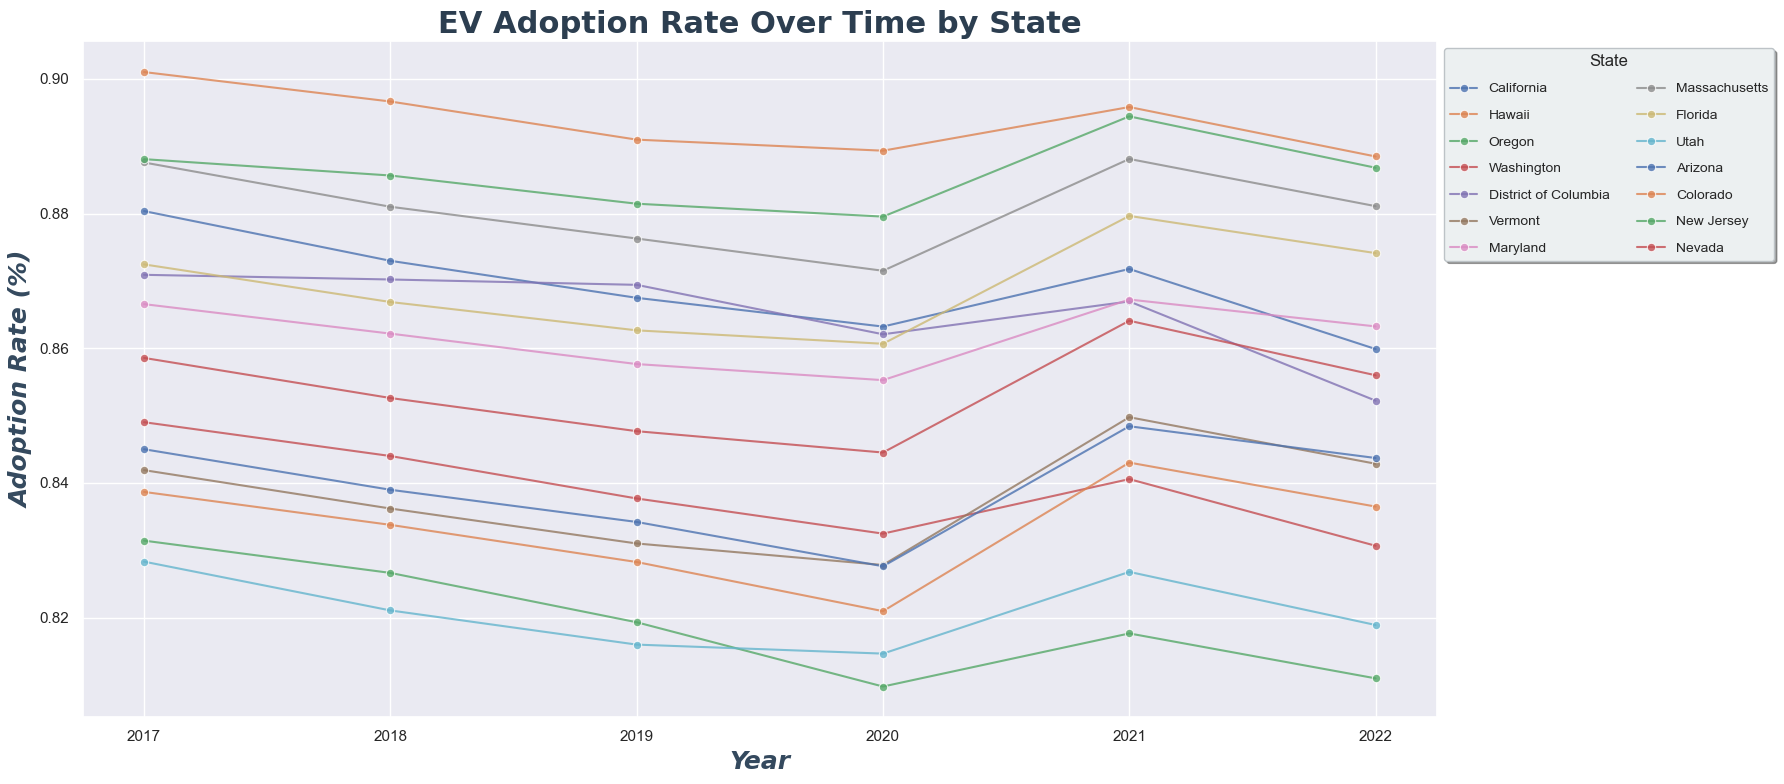

In [16]:
# Plot the EV adoption rate over time by state (2016 - 2022)

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    top_states,
    ax, 
    x="year", 
    y="gas_adoption_rate", 
    hue="state",
    title="EV Adoption Rate Over Time by State",
    x_label="Year",
    y_label="Adoption Rate (%)",
    leg_title="State"
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
# file_name = "ev_adoption_rate_over_time_by_state.png"
# file_path = Path(f"../../../../reports/figures/{file_name}")
# plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

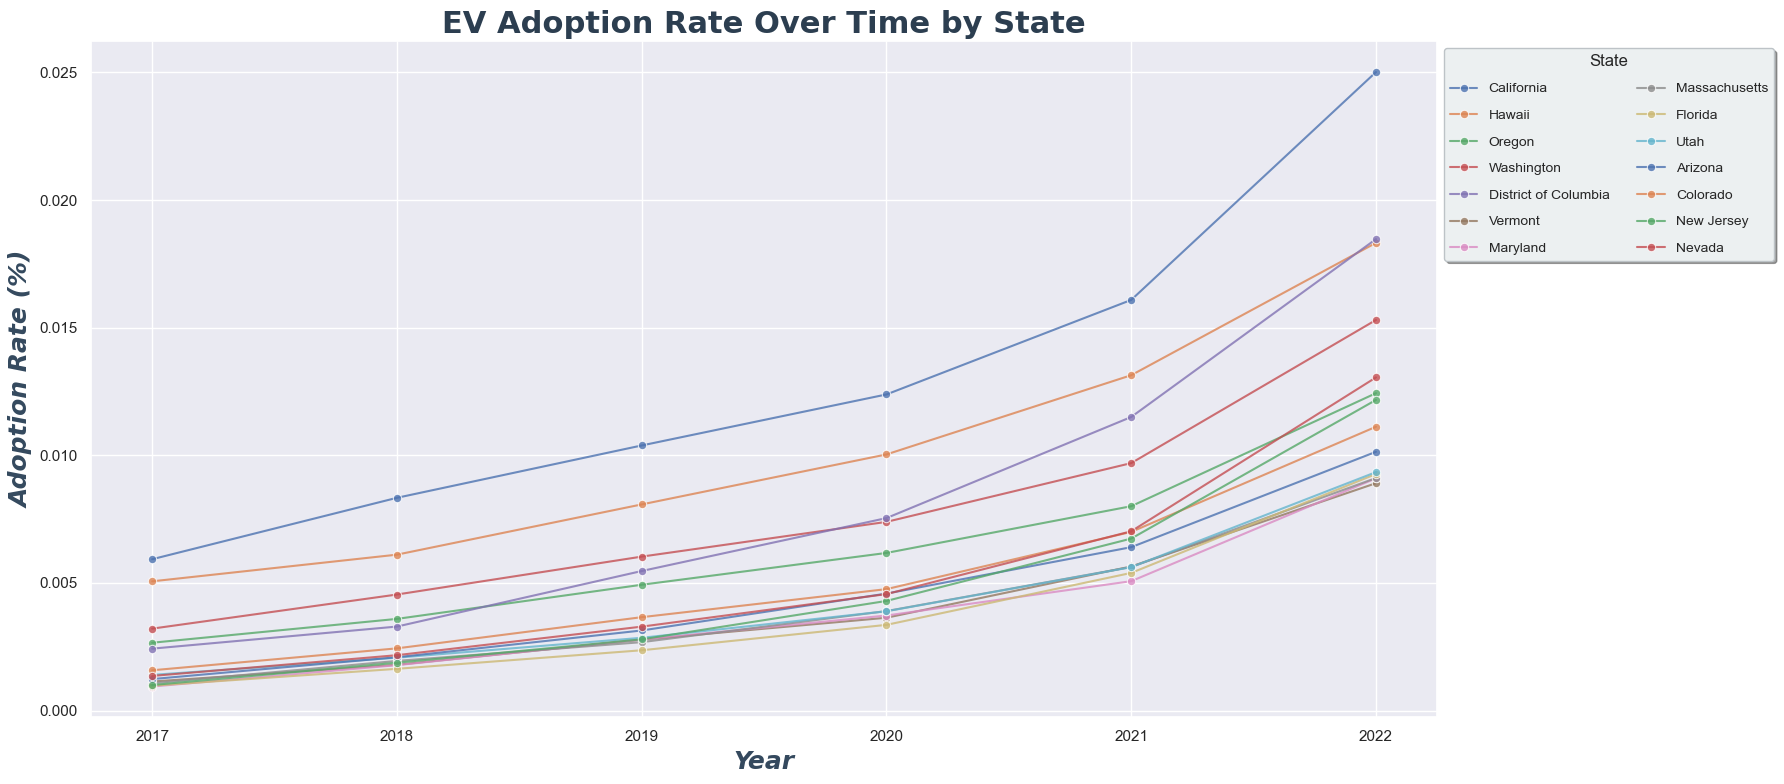

In [13]:
# Plot the EV adoption rate over time by state (2016 - 2022)

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    top_states,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="state",
    title="EV Adoption Rate Over Time by State",
    x_label="Year",
    y_label="Adoption Rate (%)",
    leg_title="State"
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
# file_name = "ev_adoption_rate_over_time_by_state.png"
# file_path = Path(f"../../../../reports/figures/{file_name}")
# plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [14]:
# Same create an HVPLOT lineplot

df.hvplot.line(
    x='year',
    y='ev_adoption_rate',
    by='state',
    title='EV Adoption Rate by State',
    xlabel='Year',
    ylabel='EV Adoption Rate (%)',
    height=500,
    width=1000,
    legend='top_right',
    grid=True,
    fontscale=1.5,
    fontsize={'title': 20, 'labels': 16, 'ticks': 14},
    line_width=1,
)

:NdOverlay   [state]
   :Curve   [year]   (ev_adoption_rate)

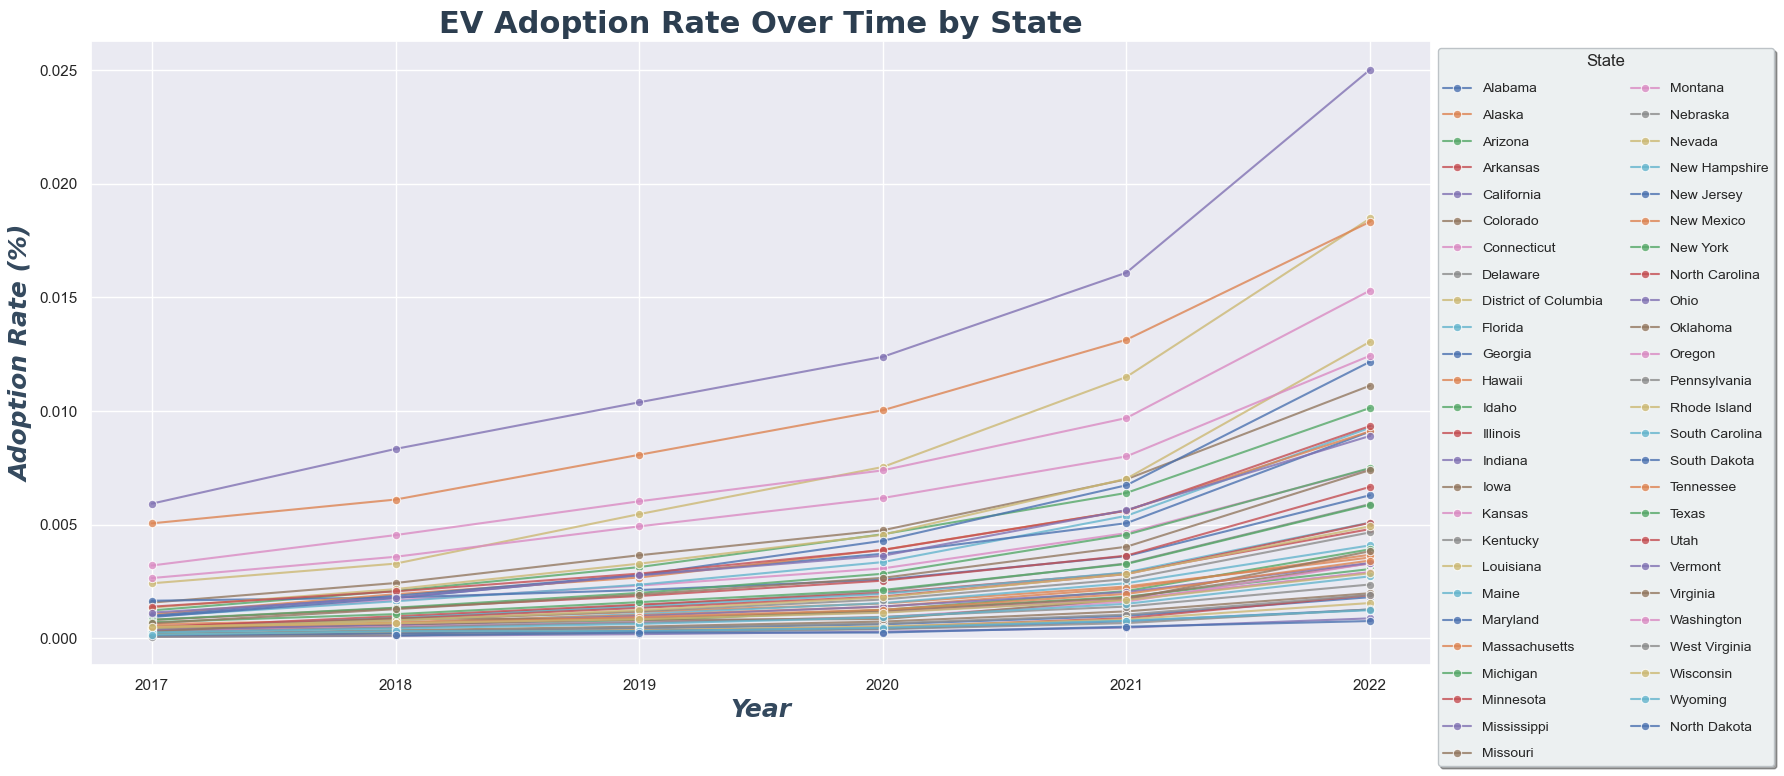

In [15]:
# Plot the EV adoption rate over time by state (2016 - 2022)

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df,
    ax, 
    x="year", 
    y="ev_adoption_rate", 
    hue="state",
    title="EV Adoption Rate Over Time by State",
    x_label="Year",
    y_label="Adoption Rate (%)",
    leg_title="State"
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
# file_name = "ev_adoption_rate_over_time_by_state.png"
# file_path = Path(f"../../../../reports/figures/{file_name}")
# plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()